Enter X data: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
Enter Y data: 3, 4, 2, 4, 5, 7, 8, 12, 10, 13
B0: 0.2666666666666657 B1: 1.187878787878788
Equation: y = 0.2666666666666657 + 1.187878787878788 x


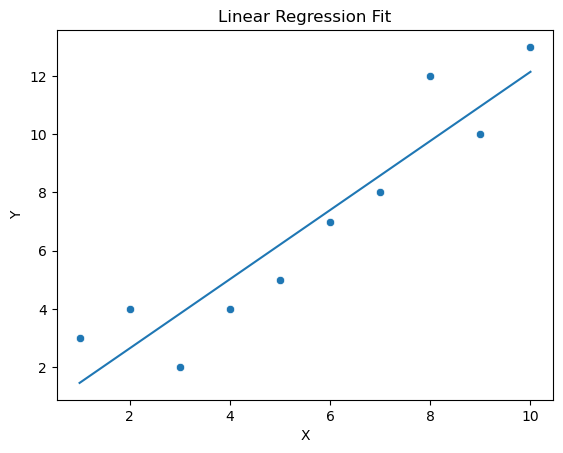

In [2]:
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

# Input X and Y data from user, assuming comma-separated values
x = list(map(int, input("Enter X data: ").split(", ")))
y = list(map(int, input("Enter Y data: ").split(", ")))

n = len(x)  # Number of data points

# Calculate mean of X and Y
xmean = sum(x) / n
ymean = sum(y) / n

# Calculate deviations a = (x_i - xmean) and b = (y_i - ymean)
a = [x[i] - xmean for i in range(n)]
b = [y[i] - ymean for i in range(n)]

# Calculate ab, a^2, and b^2
ab = [a[i] * b[i] for i in range(n)]
asqaure = [a[i]**2 for i in range(n)]
bsquare = [b[i]**2 for i in range(n)]

# Calculate correlation coefficient r
r = sum(ab) / sqrt(sum(asqaure) * sum(asqaure))

# Calculate standard deviations of y (dely) and x (delx)
dely = sqrt(sum(bsquare)) / sqrt(n - 1)
delx = sqrt(sum(bsquare)) / sqrt(n - 1)

# Calculate slope (b1) and intercept (b0) of the regression line
b1 = r * (dely / delx)
b0 = ymean - b1 * xmean

# Print coefficients and regression equation
print("B0:", b0, "B1:", b1)
print("Equation: y =", b0, "+", b1, "x")

# Plotting using seaborn and matplotlib
sns.scatterplot(x=x, y=y)  # Scatter plot of the data points
xpred = [i for i in range(min(x), max(x) + 1)] # Range of x values for prediction
ypred = [b0 + (b1 * i) for i in xpred] # Predicted y values using regression equation
sns.lineplot(x=xpred, y=ypred)  # Plotting the regression line

# Adding labels and title to the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')

plt.show()  # Display the plot


In [5]:
# import library used for numerical computations in python
import numpy 

# Define the data points
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [3, 4, 2, 4, 5, 7, 8, 12, 10, 13]

# Calculate mean of x and y
meanx = numpy.mean(x)
meany = numpy.mean(y)

# Initialize lists to store deviations and squared deviations
xsubmean = []
ysubmean = []
xsubmeansq = []
ysubmeansq = []
xsubmeanysubmean = []

# Calculate deviations and squared deviations
for i in range(len(x)):
    xsubmean.append(x[i] - meanx)
    ysubmean.append(y[i] - meany)
    xsubmeansq.append(xsubmean[i]**2)
    ysubmeansq.append(ysubmean[i]**2)
    xsubmeanysubmean.append(xsubmean[i] * ysubmean[i])

# Print headers for the table
print("x\ty\tp=x-x'\tq=y-y'\t\t p^2\t\tq^2\t\tp*q")
# Print each data point with respective deviations and squared deviations
for i in range(len(x)):
    print(str(x[i]) + "\t" + str(y[i]) + "\t" +
          str(round(xsubmean[i], 2)) + "\t" + str(round(ysubmean[i], 2)) + 
          "\t\t" + str(round(xsubmeansq[i], 2)) + "\t\t" +
          str(round(ysubmeansq[i], 2)) + "\t\t" +
          str(round(xsubmeanysubmean[i], 2)))
# Calculate sums of squared deviations and product of deviations
xsubmeansqsum = sum(xsubmeansq)
ysubmeansqsum = sum(ysubmeansq)
xsubmeanysubmeansum = sum(xsubmeanysubmean)

# Print mean values and sums
print("x'=", meanx)
print("y'=", meany)
print("Sum x-x' = ", round(xsubmeansqsum, 2))
print("Sum y-y' = ", round(ysubmeansqsum, 2))
print("(x-x')(y-y') = ", round(xsubmeanysubmeansum, 2))

# Calculate correlation coefficient (Pearson's r)
r = xsubmeanysubmeansum / ((xsubmeansqsum * ysubmeansqsum)**0.5)
print("r", round(r, 2))

# Calculate slope of the regression line (b)
b = xsubmeanysubmeansum / xsubmeansqsum
print("b", round(b, 2))

# Calculate intercept of the regression line (a)
a = meany - (b * meanx)
print("a", round(a, 2))

# Print equation of the regression line
print("Line of Regression: y = " + str(round(a, 2)) + "+" + str(round(b, 2)) + "*x")

# Predict y for a given x value entered by the user
xh = float(input("Enter the x value: "))
yk = a + b * xh
print("For x = ", xh)
print("y = ", round(yk, 2))


x	y	p=x-x'	q=y-y'		 p^2		q^2		p*q
1	3	-4.5	-3.8		20.25		14.44		17.1
2	4	-3.5	-2.8		12.25		7.84		9.8
3	2	-2.5	-4.8		6.25		23.04		12.0
4	4	-1.5	-2.8		2.25		7.84		4.2
5	5	-0.5	-1.8		0.25		3.24		0.9
6	7	0.5	0.2		0.25		0.04		0.1
7	8	1.5	1.2		2.25		1.44		1.8
8	12	2.5	5.2		6.25		27.04		13.0
9	10	3.5	3.2		12.25		10.24		11.2
10	13	4.5	6.2		20.25		38.44		27.9
x'= 5.5
y'= 6.8
Sum x-x' =  82.5
Sum y-y' =  133.6
(x-x')(y-y') =  98.0
r 0.93
b 1.19
a 0.27
Line of Regression: y = 0.27+1.19*x
Enter the x value: 9
For x =  9.0
y =  10.96
